In [1]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
def plotPrecisionRecallCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        

        
    plt.title(title)
    
    no_skill = len(y_test[y_test['0']==1]) / len(y_test)

    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    
    ax.legend(loc='upper right')
    #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/baseline/' + fileName)
    
    plt.show()

In [3]:
def plotROCCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import plot_roc_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_roc_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        
        

        
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    
    ax.legend(loc='lower right')
    #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/baseline/' + fileName)
    
    plt.show()

In [4]:
def tuneF05(precision, recall, thresholds, modelName):
    
    # convert to F0.5 score
    beta = 0.5 
    f05score = ( (1 + pow(0.5, 2)) * precision * recall ) / (pow(0.5, 2)* precision + recall )


    # locate the index of the largest f 0.5 score
    ix = argmax(f05score)


    print('Best Threshold=%.2f, F0.5-Score=%.2f' % (thresholds[ix], f05score[ix]))
    print('Precision at largest F05 score=%.2f, Recall at largest F05 score=%.2f' % (precision[ix], recall[ix]))


    no_skill = len(y_test[y_test['0']==1]) / len(y_test)

    pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    pyplot.plot(recall, precision, marker='.', label=modelName, zorder=1)

    # set zorder so dots appear over line
    pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best F0.5 Score', zorder=2)

    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    
    # save plot
    print(modelName)
    plt.savefig('figures/thresholdTuning/precision_recall_f05score_' + modelName +'.png')


    # show the plot
    pyplot.show()

In [5]:
def fitModels(X_train, X_test, y_train, y_test):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.calibration import CalibratedClassifierCV

    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))  
    models.append(('SVM', SVC(probability=True)))
    svm = LinearSVC()
    nb = GaussianNB()
    models.append(('LinearSVM', CalibratedClassifierCV(svm))) 
    models.append(('NB', CalibratedClassifierCV(nb)))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))

    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        # predict probabilities
        y_pred = model.predict_proba(X_test)

        # keep probabilities for the positive outcome only
        y_pred = y_pred[:, 1]

        # calculate roc curves
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
        
        tuneF05(precision, recall, thresholds, name)
        

In [6]:
import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

# Tune Threshold for BiB Dataset Models

In [7]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# make feature matrix and target matrix
X = pd.read_csv('BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


baseline_precision-recall.png


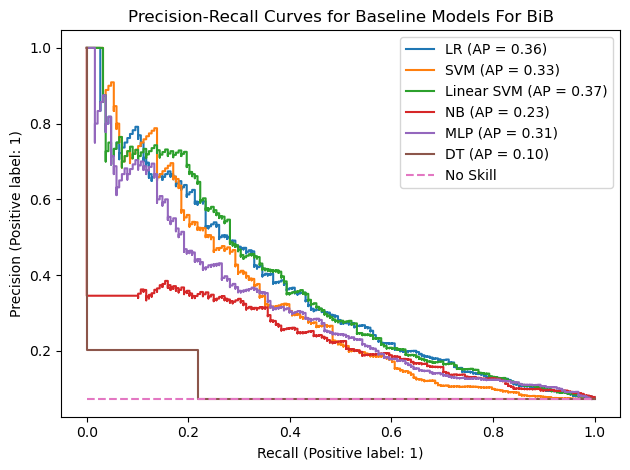

In [8]:
# plot PR curves for all models
plotPrecisionRecallCurves(X_train, X_test, y_train, y_test,
                          "Precision-Recall Curves for Baseline Models For BiB", "baseline_precision-recall")


baseline_roc.png


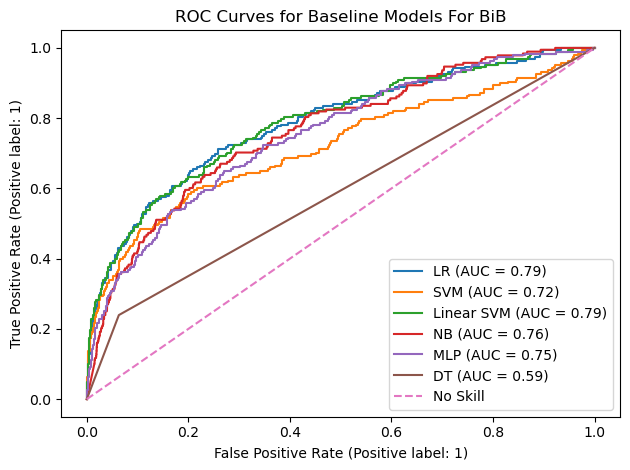

In [9]:
#plot ROC curves for all models
plotROCCurves(X_train, X_test, y_train, y_test,
                          "ROC Curves for Baseline Models For BiB", "baseline_roc")

Best Threshold=0.35, F0.5-Score=0.45
Precision at largest F05 score=0.59, Recall at largest F05 score=0.23
LR


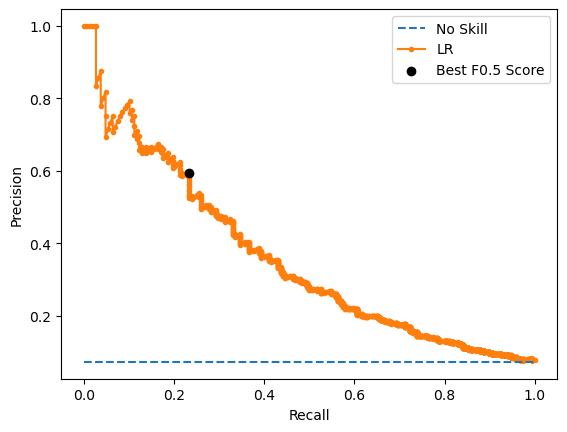

Best Threshold=0.30, F0.5-Score=0.43
Precision at largest F05 score=0.70, Recall at largest F05 score=0.17
SVM


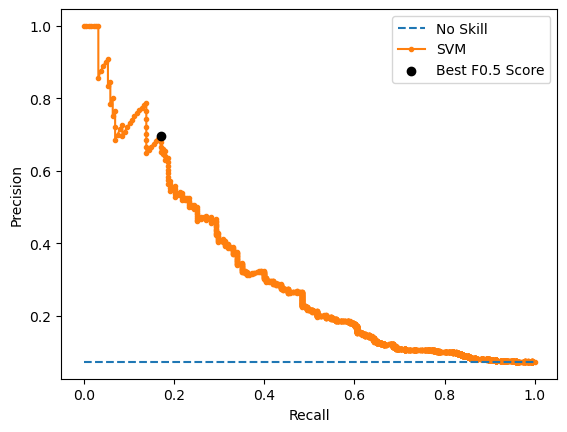

Best Threshold=0.40, F0.5-Score=0.47
Precision at largest F05 score=0.67, Recall at largest F05 score=0.22
LinearSVM


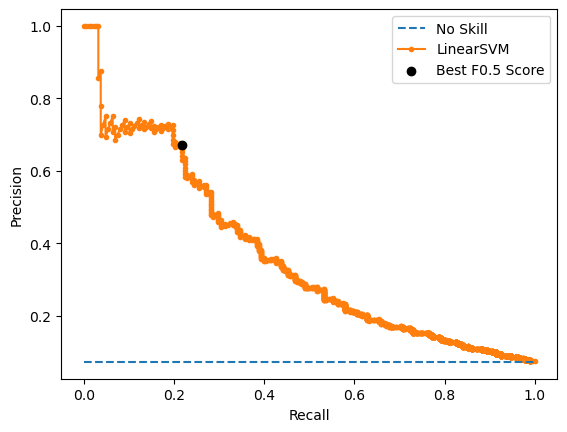

Best Threshold=0.22, F0.5-Score=0.34
Precision at largest F05 score=0.36, Recall at largest F05 score=0.28
NB


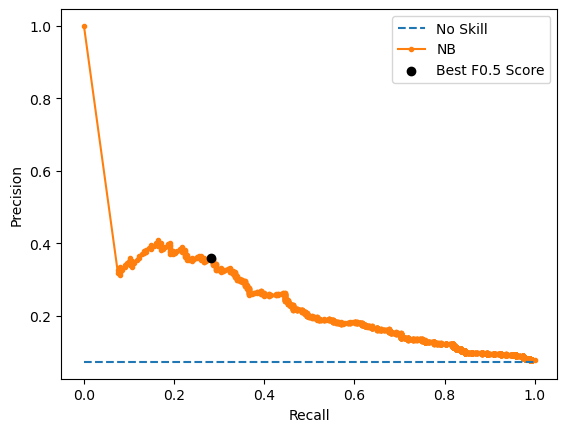

Best Threshold=0.54, F0.5-Score=0.37
Precision at largest F05 score=0.44, Recall at largest F05 score=0.22
MLP


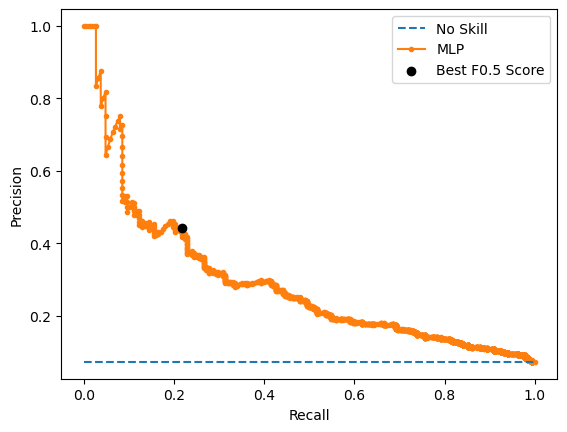

Best Threshold=1.00, F0.5-Score=0.22
Precision at largest F05 score=0.21, Recall at largest F05 score=0.22
DT


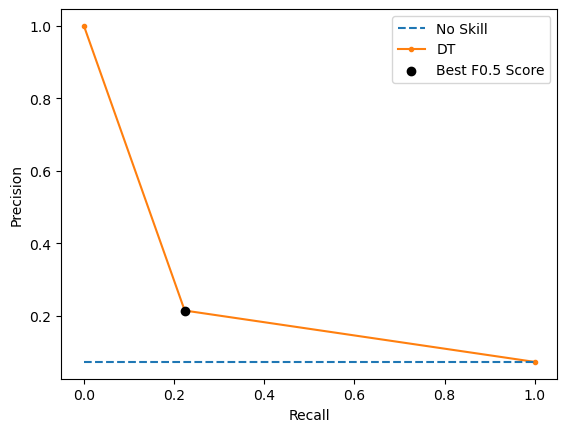

In [10]:
# tune threshold for optimal F0.5 score for each model and plot pr curve
fitModels(X_train, X_test, y_train, y_test)

In [11]:
# convert to F0.5 score
beta = 0.5 
f05score = ( (1 + pow(0.5, 2)) * precision * recall ) / (pow(0.5, 2)* precision + recall )

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f 0.5 score
ix = argmax(f05score)

# locate the index of the largest f score
ix1 = argmax(fscore)


print('Best Threshold=%.2f, F0.5-Score=%.2f' % (thresholds[ix], f05score[ix]))
print('Precision at largest F05 score=%.2f, Recall at largest F05 score=%.2f' % (precision[ix], recall[ix]))

print('Best Threshold=%.2f, F-Score=%.2f' % (thresholds[ix1], fscore[ix1]))
print('Precision at largest F-score=%.2f, Recall at largest F-score=%.2f' % (precision[ix1], recall[ix1]))

# plot no-skill model
no_skill = len(testy[testy['0']==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic', zorder=1)

# set zorder so dots appear over line
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best F0.5 Score', zorder=2)
pyplot.scatter(recall[ix1], precision[ix1], marker='o', color='green', label='Best F-Score', zorder=3)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

pyplot.savefig('figures/thresholdTuning/precision_recall_fscore_f05score.png')

# show the plot
pyplot.show()

NameError: name 'precision' is not defined

In [24]:
# predict labels
yhat = model.predict(testX)
# evaluate the model
f1 = f1_score(testy, yhat)
print('F-Score: %.2f' % f1)

from sklearn.metrics import fbeta_score
f05 = fbeta_score(testy, yhat, beta=0.5)
print('F0.5-Score: %.2f' % f05)


# Therefore, using a 0.5 threshold results in an F1 score of 0.13
# However, tuning threshold to 0.157 results in F1 score of 0.356

# Therefore, using a 0.5 threshold results in an F0.5 score of 0.24
# However, tuning threshold to 0.28 results in F0.5 score of 0.34

F-Score: 0.13
F0.5-Score: 0.24


In [25]:
# another way of finding best threshold

from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# read data
X = pd.read_csv("BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("BibDependentVariableLGAEncoded.csv")

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = yhat[:, 1]

# define thresholds
thresholds = arange(0, 1, 0.001)

# evaluate each threshold
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.2f, F-Score=%.2f' % (thresholds[ix], scores[ix]))


/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Threshold=0.16, F-Score=0.36


In [26]:
# now tune using F0.5 score?

# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# read data
X = pd.read_csv("BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("BibDependentVariableLGAEncoded.csv")

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = yhat[:, 1]

# define thresholds
thresholds = arange(0, 1, 0.001)

# define f0.5 score
from sklearn.metrics import fbeta_score
def f05(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5)

# evaluate each threshold
scores = [f05(testy, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.2f, F0.5-Score=%.2f' % (thresholds[ix], scores[ix]))

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Threshold=0.28, F0.5-Score=0.34


In [12]:
# Function to plot a confusion matrix 
def conf_matrix(y_test, y_pred, title, fileName):    
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title(title)
    #plt.savefig('figures/costSensitive/' + fileName)
    plt.show()
    
    print(classification_report(y_test, y_pred))

F0.5: 0.393
Recall: 0.149
Precision: 0.667


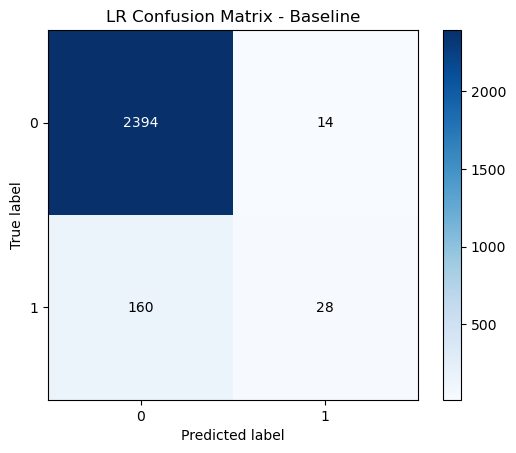

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2408
           1       0.67      0.15      0.24       188

    accuracy                           0.93      2596
   macro avg       0.80      0.57      0.60      2596
weighted avg       0.92      0.93      0.91      2596



In [13]:
# example of cost insensitive logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# define model
model = LogisticRegression(random_state=42)
# fit model
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat, "LR Confusion Matrix - Baseline", "conf_matrix_lr_baseline")

F0.5: 0.451
Recall: 0.234
Precision: 0.587


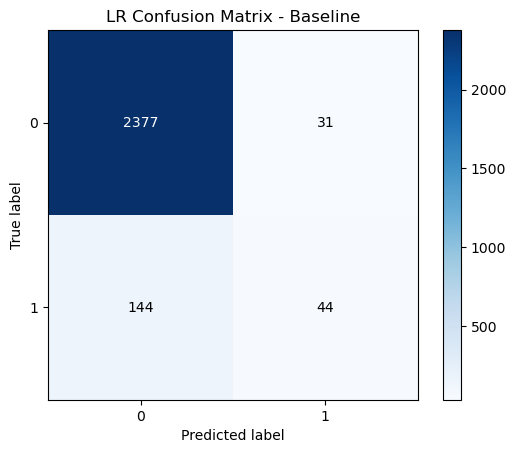

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2408
           1       0.59      0.23      0.33       188

    accuracy                           0.93      2596
   macro avg       0.76      0.61      0.65      2596
weighted avg       0.92      0.93      0.92      2596



In [16]:
#y_pred = model.predict(X_test)  # default threshold is 0.5
yhat = (model.predict_proba(X_test)[:,1] >= 0.35).astype(bool) # set threshold as 0.35

# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat, "LR Confusion Matrix - Baseline", "conf_matrix_lr_baseline")

F0.5: 0.221
Recall: 0.239
Precision: 0.217


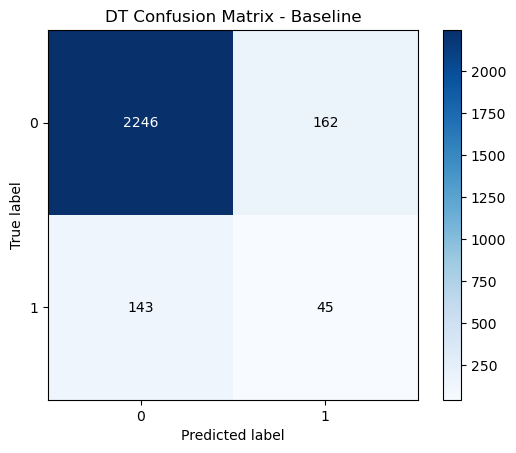

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2408
           1       0.22      0.24      0.23       188

    accuracy                           0.88      2596
   macro avg       0.58      0.59      0.58      2596
weighted avg       0.89      0.88      0.89      2596



In [19]:
# example of cost insensitive logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# define model
model = DecisionTreeClassifier(random_state=42)
# fit model
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat, "DT Confusion Matrix - Baseline", "conf_matrix_lr_baseline")

In [27]:
import numpy as np
import sys
# predict probabilities
# keep probabilities for the positive outcome only
yhat = model.predict_proba(X_test)[:, 1]
np.set_printoptions(threshold=sys.maxsize)
print(yhat)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.

[False False False ... False False False]
F0.5: 0.221
Recall: 0.239
Precision: 0.217


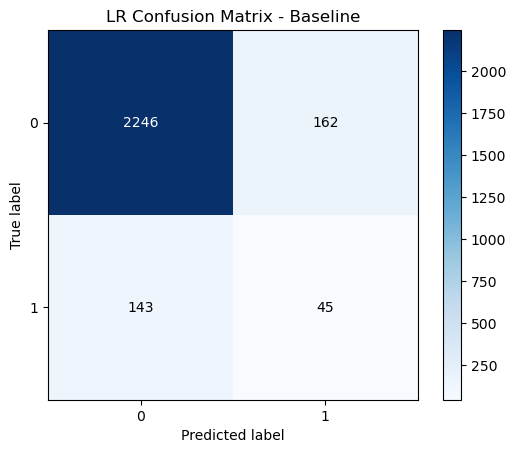

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2408
           1       0.22      0.24      0.23       188

    accuracy                           0.88      2596
   macro avg       0.58      0.59      0.58      2596
weighted avg       0.89      0.88      0.89      2596



In [21]:
#y_pred = model.predict(X_test)  # default threshold is 0.5
yhat = (model.predict_proba(X_test)[:,1] >= 1).astype(bool) # set threshold as 0.35

print(yhat)

# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat, "LR Confusion Matrix - Baseline", "conf_matrix_lr_baseline")